In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings("ignore")

In [2]:
absent = pd.read_excel('C:/Users/AJ/Documents/Workspace/Projects/Main Proj/Absenteism/Absenteeism_at_work.xls')
absent.rename(columns={'Son':'No. of Children'}, inplace=True)
absent

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,No. of Children,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
absent = pd.read_csv('C:/Users/AJ/Documents/Workspace/Projects/Main Proj/Absenteism/Absenteeism_treated.csv')
absent = absent.loc[:, ['ID', 'Reason for absence', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'No. of Children', 'Social drinker', 'Social smoker',
       'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours']]
absent

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,No. of Children,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,Unjustified absence,July,Tuesday,Summer,289,36,13,33,239554,...,No,High School,2,Yes,No,1,90,172,30,4
1,36,Morbidity/mortality,July,Tuesday,Summer,118,13,18,50,239554,...,Yes,High School,1,Yes,No,0,98,178,31,0
2,3,Medical consultation,July,Wednesday,Summer,179,51,18,38,239554,...,No,High School,0,Yes,No,0,89,170,31,2
3,7,Eye and adnexa diseases,July,Thursday,Summer,279,5,14,39,239554,...,No,High School,2,Yes,Yes,0,68,168,24,4
4,11,Medical consultation,July,Thursday,Summer,289,36,13,33,239554,...,No,High School,2,Yes,No,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,Genitourinary system diseases,July,Tuesday,Summer,289,36,13,33,264604,...,No,High School,2,Yes,No,1,90,172,30,8
736,1,Digestive system diseases,July,Tuesday,Summer,235,11,14,37,264604,...,No,Post Graduate,1,No,No,1,88,172,29,4
737,4,Morbidity/mortality,January,Tuesday,Summer,118,14,13,40,271219,...,No,High School,1,Yes,No,8,98,170,34,0
738,8,Morbidity/mortality,January,Wednesday,Autumn,231,35,14,39,271219,...,No,High School,2,Yes,No,2,100,170,35,0


<AxesSubplot:>

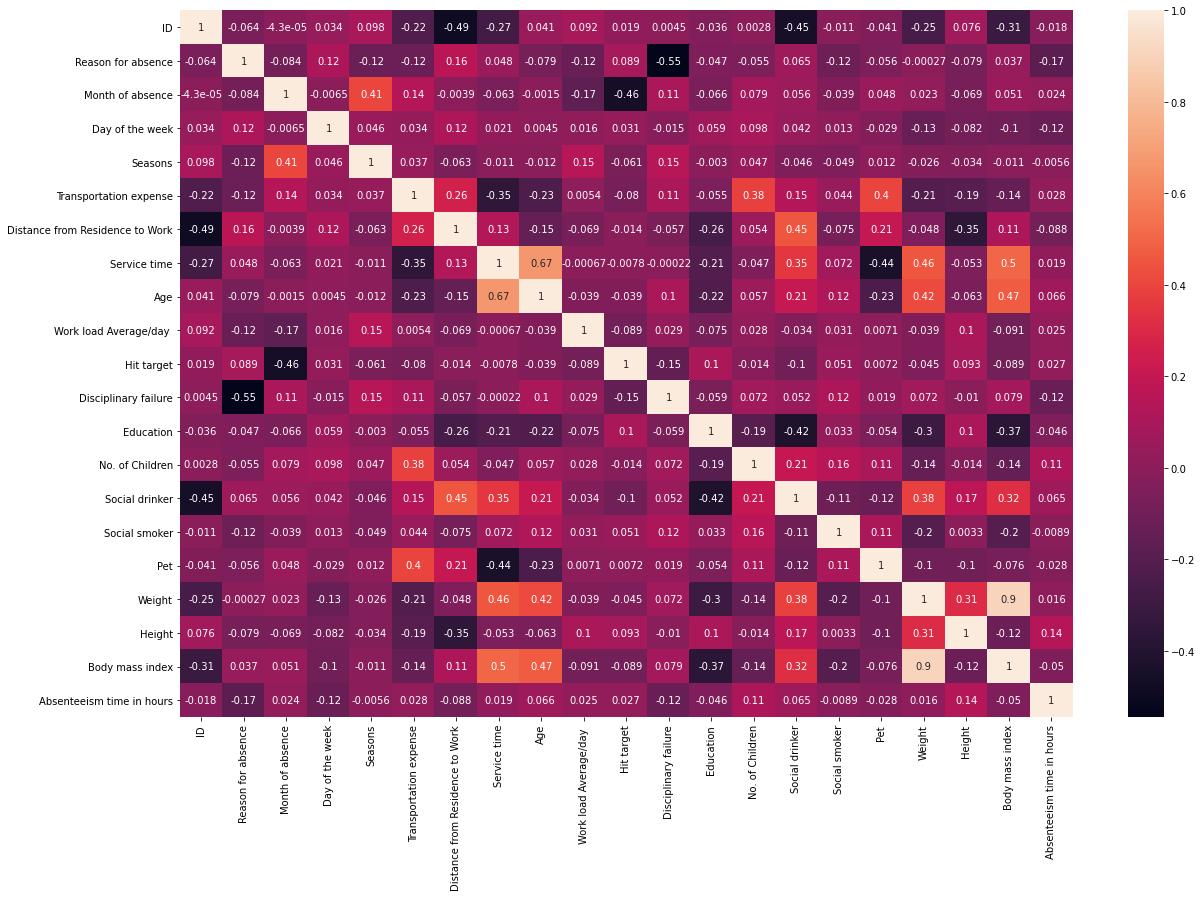

In [4]:
set_option('display.width', 100)
plt.figure(figsize=(20,13))
sns.heatmap(absent.corr(), annot=True)

# Note
This is a dataset with recurring data on 36 employees

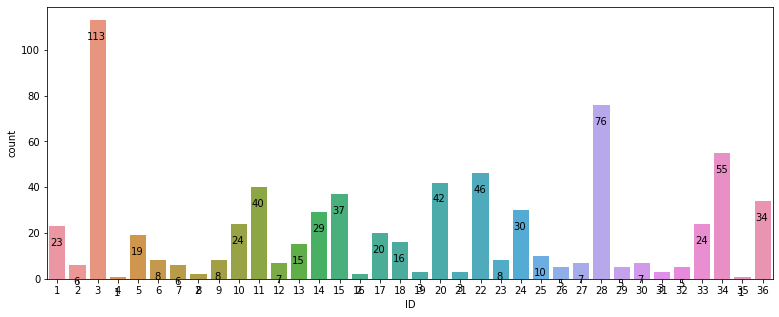

In [5]:
# checking the frequency at which each employee appear absent on record
employee = sns.countplot(x='ID', data=absent)
for a in employee.patches:
    employee.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.gcf().set_size_inches(13,5)

The employee with ID '3' has the most records for been absent. 

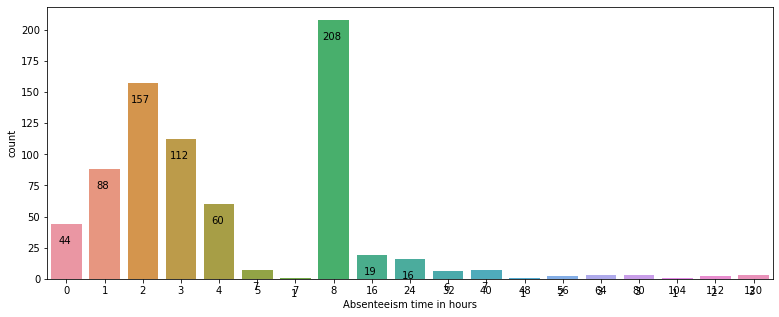

In [10]:
employee = sns.countplot(x='Absenteeism time in hours', data=absent)
for a in employee.patches:
    employee.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.gcf().set_size_inches(13,5)

Most employees have been absent for 8 hours. this is followed by 2, 3, 1, and 4 hours respectively

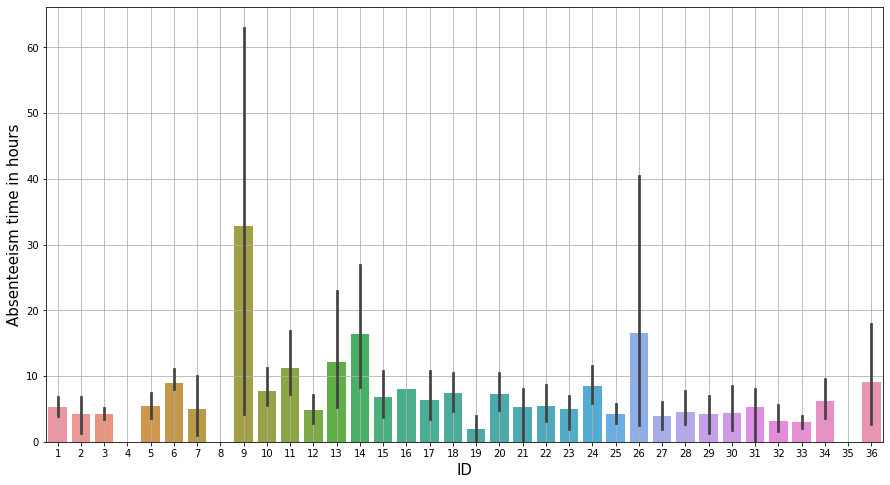

In [58]:
ax = sns.barplot(x="ID", y="Absenteeism time in hours", data=absent)
plt.gcf().set_size_inches(15,8)
ax.set_xlabel('ID', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
plt.grid()

- Employee with ID '3' was reported with the highest number of absence (113) but averages 4.5 hours whenever they are absent
- Employee with ID '9' has a low number of absence (8) but averages 32.75 hours whenever they are absent 

Medical consultation                                 149
Dental consultation                                  112
Physiotherapy                                         69
Musculoskeletal/connective tissue diseases            55
Morbidity/mortality                                   43
Injury/poisoning                                      40
Patient follow-up                                     38
Unjustified absence                                   33
Laboratory examination                                31
Digestive system diseases                             26
Resporatory system diseases                           25
Abnormal clinical/laboratory findings                 21
Genitourinary system diseases                         19
infectious/parasitic diseases                         16
Eye and adnexa diseases                               15
Skin/Subcutaneous tissue diseases                      8
Nervous system diseases                                8
Ear and mastoid diseases       

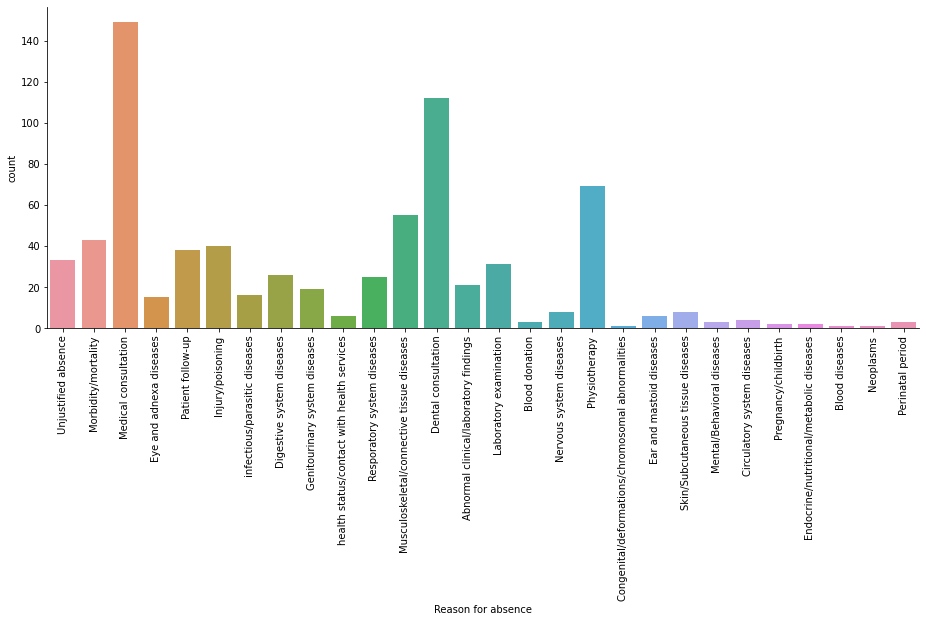

In [86]:
# checking the frequency of reasons for absence
ReaFAbs = sns.catplot(x='Reason for absence', data=absent, kind='count', aspect=3)
ReaFAbs.set_xticklabels(rotation=90)
plt.gcf().set_size_inches(13,5)

# the percentage of appearance on each reason
print(absent['Reason for absence'].value_counts())

Medical consultation, Dental consultation, and Physiotherapy (Not among the international code for Diseases) appears to be the major reasons for reoccuring absence among the employees.

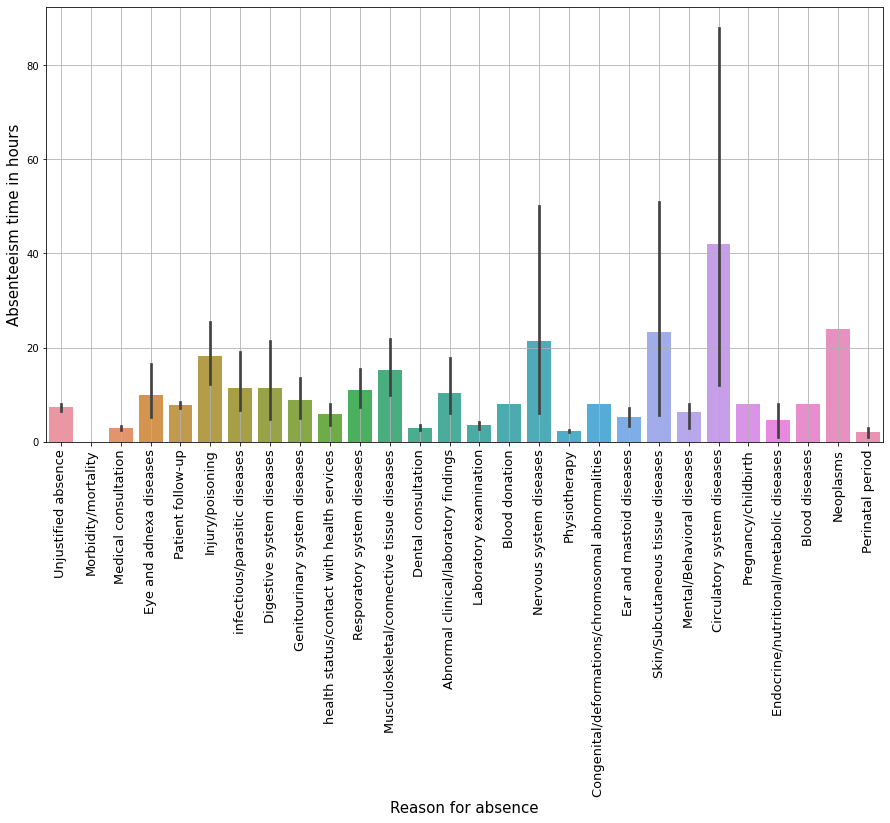

In [7]:
ax = sns.barplot(x="Reason for absence", y="Absenteeism time in hours", data=absent)
plt.gcf().set_size_inches(15,8)
ax.set_xlabel('Reason for absence', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})

# this code can be used toset fontsize and rotation of x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=90)
plt.grid()

- Circulatory system diseases is the mojor cause of longer absence among the employees averaging at 40 hours and reaching a max of 85-89 sometimes.
- It is followed by Nervous system diseases, Skin/Subcutaneous tissue diseases, and Neoplasms all average above 20 hours as reason for employees absence reaching a max of 50, 51, and 25 respectively

In [154]:
# Hours of absence for each Reason of absence
t = absent[absent['Reason for absence']=='Perinatal period']
t.describe()

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,No. of Children,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.0
mean,19.666667,197.666667,20.000000,14.000000,37.333333,243410.666667,93.666667,1.333333,0.0,67.000000,172.666667,23.000000,2.0
std,4.618802,32.331615,3.464102,5.196152,4.618802,4983.687524,4.618802,1.154701,0.0,6.928203,4.618802,1.732051,1.0
min,17.000000,179.000000,16.000000,8.000000,32.000000,237656.000000,91.000000,0.000000,0.0,63.000000,170.000000,22.000000,1.0
25%,17.000000,179.000000,19.000000,12.500000,36.000000,241972.000000,91.000000,1.000000,0.0,63.000000,170.000000,22.000000,1.5
50%,17.000000,179.000000,22.000000,17.000000,40.000000,246288.000000,91.000000,2.000000,0.0,63.000000,170.000000,22.000000,2.0
75%,21.000000,207.000000,22.000000,17.000000,40.000000,246288.000000,95.000000,2.000000,0.0,69.000000,174.000000,23.500000,2.5
max,25.000000,235.000000,22.000000,17.000000,40.000000,246288.000000,99.000000,2.000000,0.0,75.000000,178.000000,25.000000,3.0


The average hours each employee may have to be absent for every reason of absence
- Unjustified absence: Min=4, Average=07.27, Max=16
- Morbidity/mortality: Min=0, Average=0, Max=0
- Medical consultation: Min=1, Average=2.85, Max=16
- Eye and adnexa diseases: Min=1, Average=10.86, Max=40
- Patient follow-up: Min=3, Average=7.71, Max=16
- Injury/poisoning: Min=, Average=18.22, Max=104
- infectious/parasitic diseases: Min=1, Average=11.37, Max=64
- Digestive system diseases: Min=1, Average=11.42, Max=120
- Genitourinary system diseases: Min=2, Average=8.79, Max=40
- health status/contact with health services: Min=1, Average=5.83, Max=8
- Resporatory system diseases: Min=2, Average=11.04, Max=48
- Musculoskeletal/connective tissue diseases: Min=1, Average=15.31, Max=120
- Dental consultation: Min=1, Average=2.99, Max=24
- Abnormal clinical/laboratory findings: Min=1, Average=10.33, Max=80
- Laboratory examination: Min=1, Average=3.48, Max=8
- Blood donation: Min=8, Average=8, Max=8
- Nervous system diseases: Min=3, Average=21.37, Max=120
- Physiotherapy: Min=0, Average=2.27, Max=3
- Congenital/deformations/chromosomal abnormalities: Min=8, Average=8, Max=8
- Ear and mastoid diseases: Min=2, Average=5.33, Max=8
- Skin/Subcutaneous tissue diseases: Min=1, Average=23.37, Max=112
- Mental/Behavioral diseases: Min=3, Average=6.33, Max=8
- Circulatory system diseases: Min=8, Average=42, Max=112
- Pregnancy/childbirth: Min=8, Average=8, Max=8
- Endocrine/nutritional/metabolic diseases: Min=1, Average=4.5, Max=8
- Blood diseases: Min=8, Average=8, Max=8
- Neoplasms: Min=24, Average=24, Max=24
- Perinatal period: Min=1, Average=2, Max=3

To properly understand the frequency in the reasons for each employees being absent, two clusters should be created
- categories with International Code of Diseases (ICD)
- categories without International Code of Diseases (NICD)

In [17]:
reason = absent
reason['Reason for absence'] = reason['Reason for absence'].replace({'infectious/parasitic diseases':'ICD', 'Neoplasms':'ICD', 'Blood diseases':'ICD', 
                                     'Endocrine/nutritional/metabolic diseases':'ICD', 'Digestive system diseases':'ICD', 
                                     'Mental/Behavioral diseases':'ICD', 'Nervous system diseases':'ICD',
                                     'Eye and adnexa diseases':'ICD', 'Ear and mastoid diseases':'ICD',
                                     'Circulatory system diseases':'ICD', 'Resporatory system diseases':'ICD',
                                     'Skin/Subcutaneous tissue diseases':'ICD', 'Musculoskeletal/connective tissue diseases':'ICD', 
                                     'Genitourinary system diseases':'ICD', 'Pregnancy/childbirth':'ICD', 
                                     'Perinatal period':'ICD', 'Congenital/deformations/chromosomal abnormalities':'ICD', 
                                     'Abnormal clinical/laboratory findings':'ICD', 'Injury/poisoning':'ICD', 
                                     'Morbidity/mortality':'ICD', 'health status/contact with health services':'ICD', 
                                     
                                     'Patient follow-up':'NICD', 'Medical consultation':'NICD', 
                                     'Blood donation':'NICD', 'Laboratory examination':'NICD', 
                                     'Unjustified absence':'NICD', 'Physiotherapy':'NICD', 'Dental consultation':'NICD'}
                                    )
reason

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,No. of Children,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,NICD,July,Tuesday,Summer,289,36,13,33,239554,...,No,High School,2,Yes,No,1,90,172,30,4
1,36,ICD,July,Tuesday,Summer,118,13,18,50,239554,...,Yes,High School,1,Yes,No,0,98,178,31,0
2,3,NICD,July,Wednesday,Summer,179,51,18,38,239554,...,No,High School,0,Yes,No,0,89,170,31,2
3,7,ICD,July,Thursday,Summer,279,5,14,39,239554,...,No,High School,2,Yes,Yes,0,68,168,24,4
4,11,NICD,July,Thursday,Summer,289,36,13,33,239554,...,No,High School,2,Yes,No,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,ICD,July,Tuesday,Summer,289,36,13,33,264604,...,No,High School,2,Yes,No,1,90,172,30,8
736,1,ICD,July,Tuesday,Summer,235,11,14,37,264604,...,No,Post Graduate,1,No,No,1,88,172,29,4
737,4,ICD,January,Tuesday,Summer,118,14,13,40,271219,...,No,High School,1,Yes,No,8,98,170,34,0
738,8,ICD,January,Wednesday,Autumn,231,35,14,39,271219,...,No,High School,2,Yes,No,2,100,170,35,0


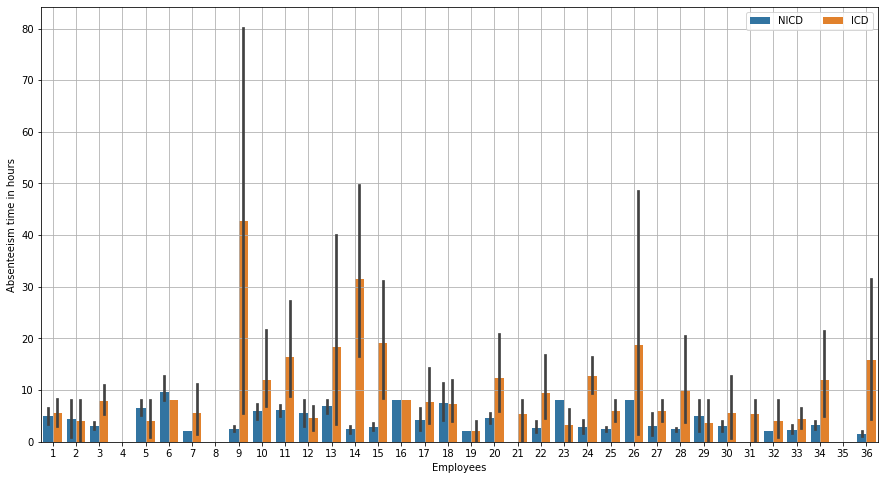

In [20]:
ax = sns.barplot(x="ID", y="Absenteeism time in hours", hue='Reason for absence', data=reason)
plt.gcf().set_size_inches(15,8)
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel('Employees', fontdict={'fontsize' : 10})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 10})
plt.grid()

This chart tells us that International Code of Diseases (ICD) cases makes employees stay absent for longer hours

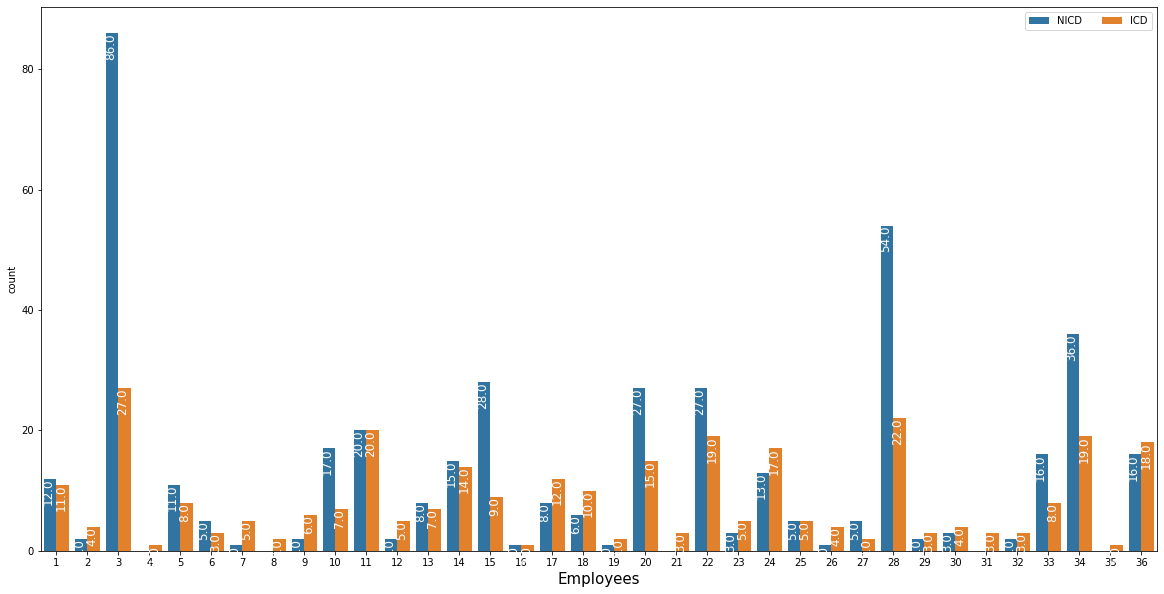

In [34]:
ax = sns.countplot(x="ID", hue="Reason for absence", data=reason)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel('Employees', fontdict={'fontsize' : 15})
for a in ax.patches:
    ax.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='right', va='top', color='white', size=12, rotation=90)

However, this chart tells us that a good number of employees report absent the most for Non-International Code of Diseases (NICD) cases

# Analysing the features with stronger correlation values against the hours of absence

In [24]:
# Analysing the Employees distance to work
km = KMeans(n_clusters=2, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
km1 = KMeans(n_clusters=3, init= 'k-means++', max_iter=300, n_init=10, random_state=0)

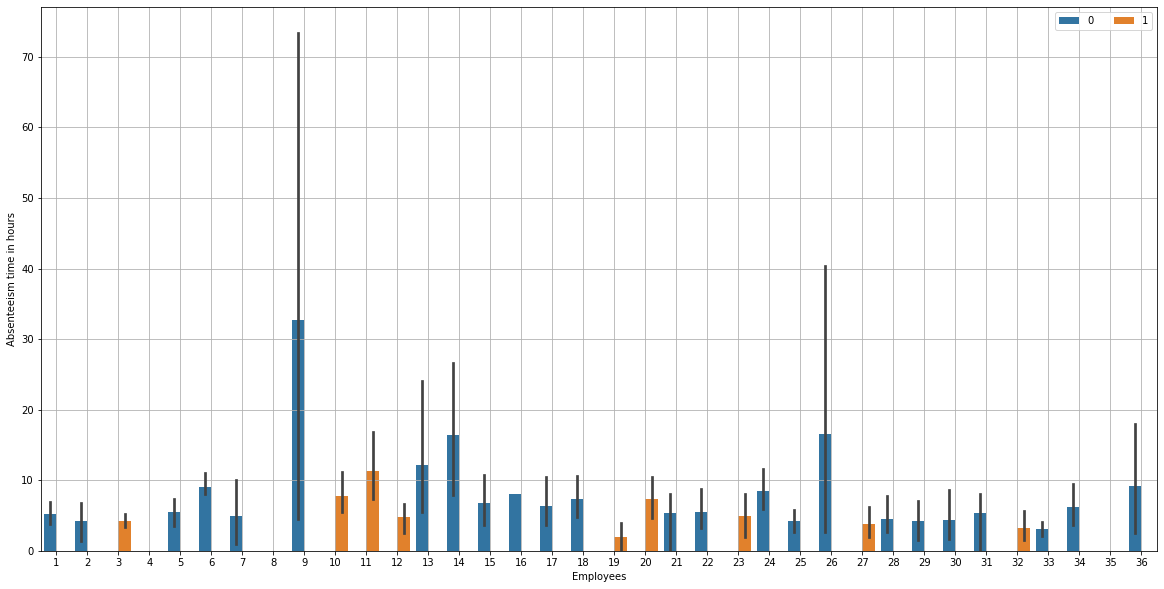

In [41]:
# creating a cluster for the Distance from Residence to Work column
clusDist = km.fit_predict(absent[['Distance from Residence to Work']])

# creating a chart with the clustered column
ax = sns.barplot(x="ID", y="Absenteeism time in hours", hue=clusDist, data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel('Employees', fontdict={'fontsize' : 10})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 10})
plt.grid()

In [45]:
ax = pd.DataFrame(clusDist, absent['Distance from Residence to Work'])
ax = ax.rename(columns = {'Distance from Residence to Work' : 'Distance from Residence to Work', 0 : 'clusters'})

show = (ax[ax['clusters']==1])
show.sort_values(by='Distance from Residence to Work', ascending=True)

,clusters
Distance from Residence to Work,
35,1
35,1
36,1
36,1
36,1
...,...
52,1
52,1
52,1


this shows that:
- distance from 5-31 (shorter distance from work) are in cluster 0
- distance from 35-52 (longer distance from work) are in cluster 1

the chart shows that:
- most employees live within short distance from work 
- it also obvious that employees with shorter the distance from work the have higher hours of absence

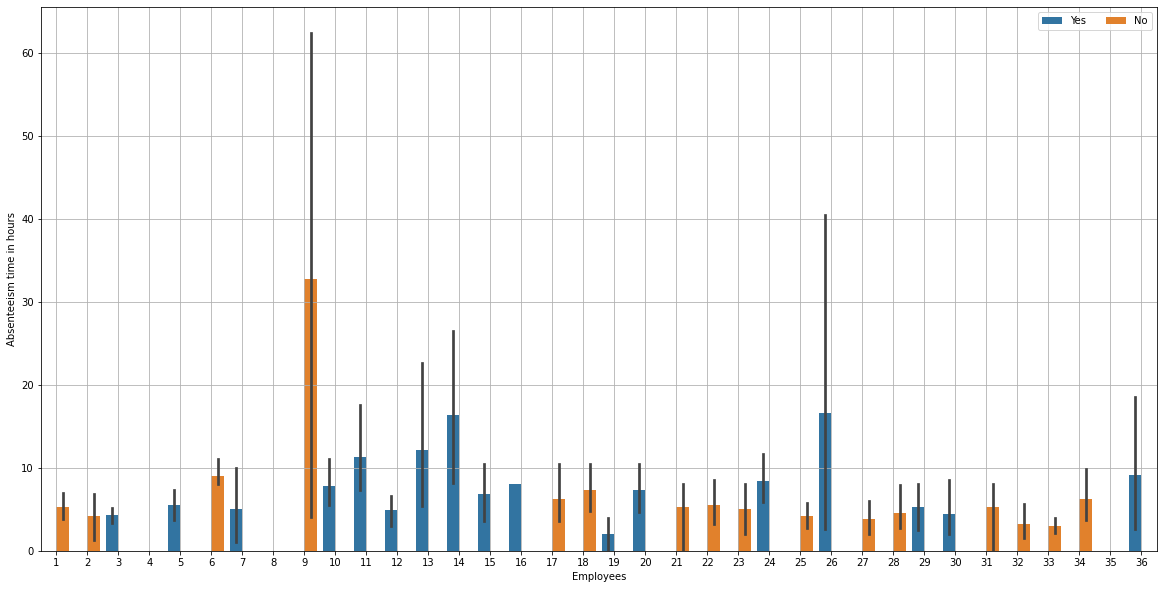

In [46]:
# analysing if the Employees are social drinkers or not
ax = sns.barplot(x="ID", y="Absenteeism time in hours", hue='Social drinker', data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel('Employees', fontdict={'fontsize' : 10})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 10})
plt.grid()

Employees who are social drinkers tend to have a higher average hours of absence. Except employee 9 of course

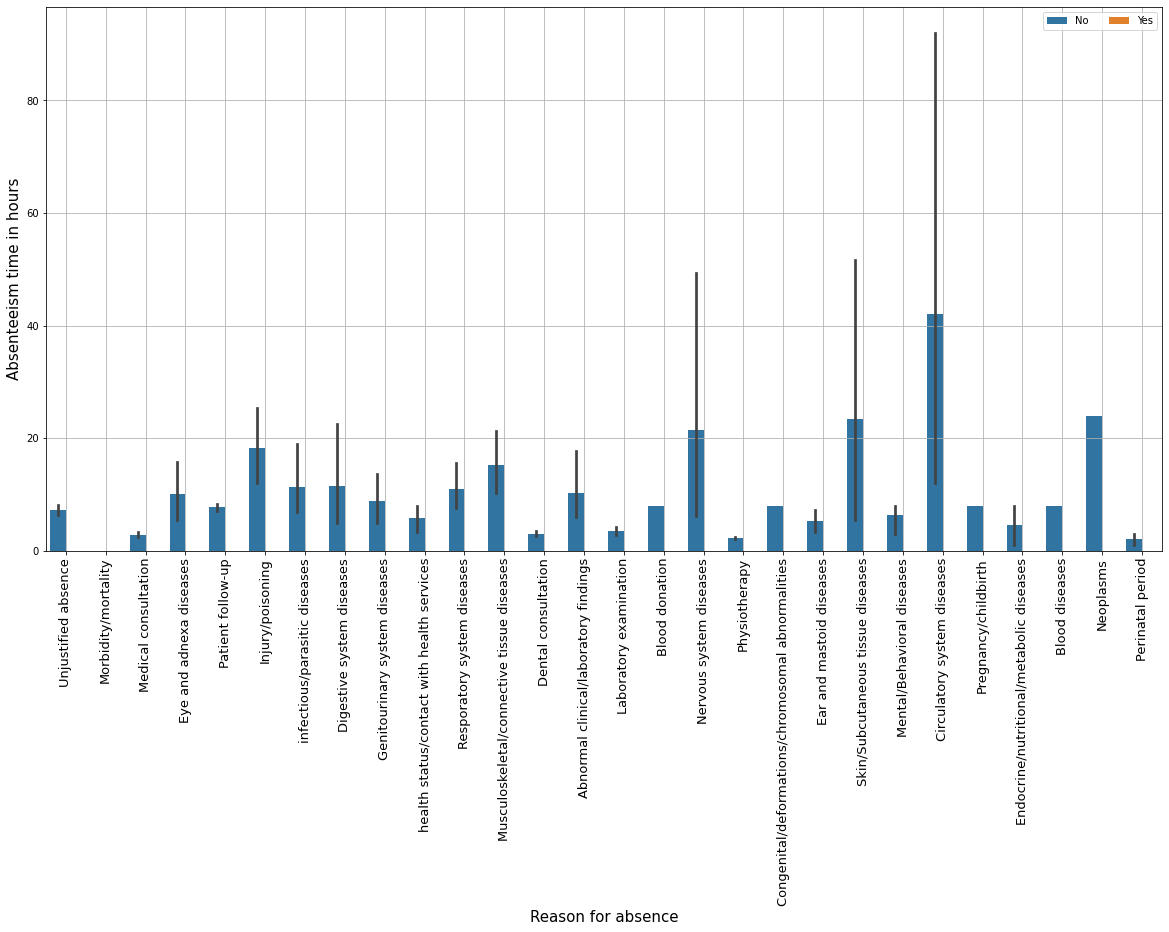

In [53]:
# Analysing the employees disciplinary failure
ax = sns.barplot(x="Reason for absence", y="Absenteeism time in hours", hue='Disciplinary failure', data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel('Reason for absence', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=90)
plt.grid()

We can see that:
- Circulatory system diseases (ICD) is the mojor cause of high hours of absence among the employees averaging at 40 hours and reaching a max of 85-89 sometimes. 
- Nervous system diseases, Skin/Subcutaneous tissue diseases, and Neoplasms (all under ICD) all average above 20 hours as reason why employees are absent the longest reaching a max of 50, 51, and 25 respectively

Also none of the employees have failed a desciplinary action taken against them for been absent

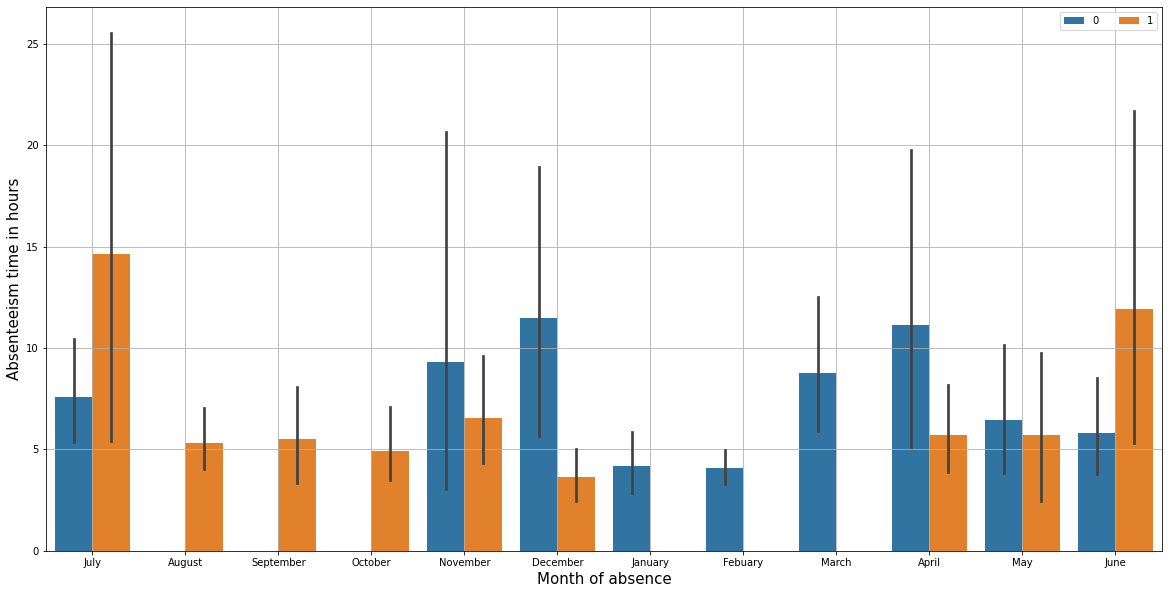

In [55]:
# Analysis for the months of absence and employees hit target
clusHit = km.fit_predict(absent[['Hit target']])
ax = sns.barplot(x="Month of absence", y="Absenteeism time in hours", hue=clusHit, data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel('Month of absence', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
plt.grid()

In [57]:
ax = pd.DataFrame(clusHit, absent['Hit target'])
ax = ax.rename(columns = {'Hit target' : 'Hit target', 0 : 'clusters'})

show = (ax[ax['clusters']==0])
show.sort_values(by='Hit target', ascending=True)

,clusters
Hit target,
95,0
95,0
95,0
95,0
95,0
...,...
100,0
100,0
100,0


- hit targets from 81-94 are in cluster 1 (lower hit target)
- hit targets from 95-100 are in cluster 0  higher hit target)

we can see that: 
- From june to october (5 months), most employees with a lower hit target are absent for longer hours
- From november to may (7 months), most employees with a higher hit target are absent for longer hours

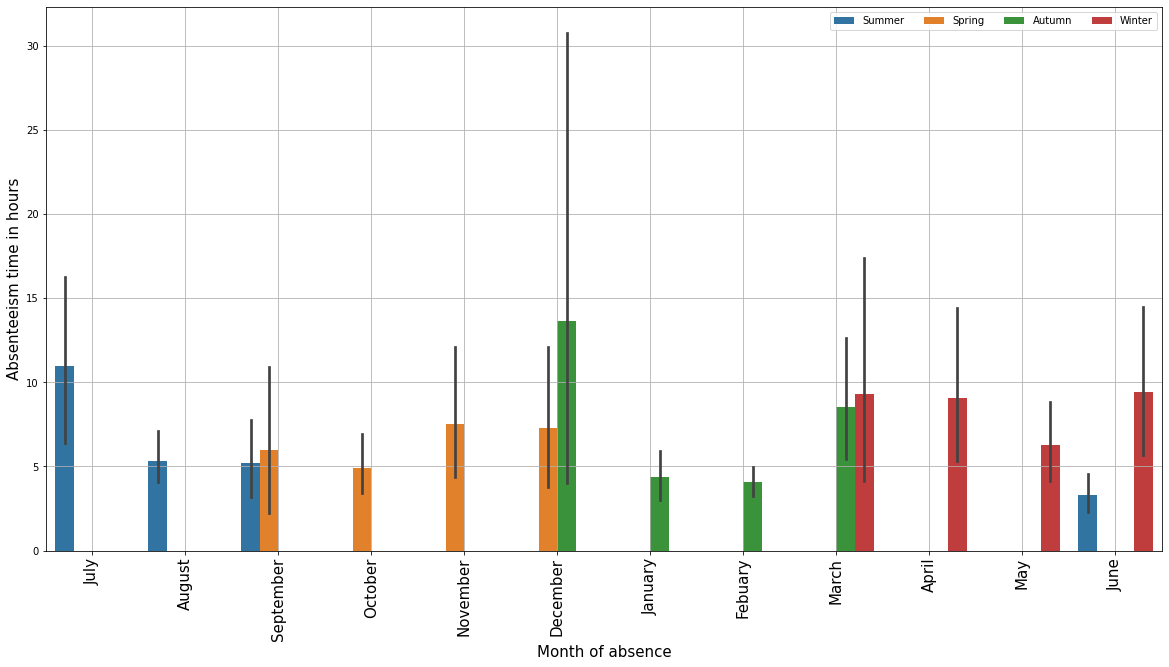

In [58]:
# Analysis for the months of absence and seasons
ax = sns.barplot(x="Month of absence", y="Absenteeism time in hours", hue='Seasons', data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel('Month of absence', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})

# this code can be used toset fontsize and rotation of x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=90)
plt.grid()

This chart shows us that:
- employees are absent the most in December (which marks the end Spring and the beginning of Autumn)

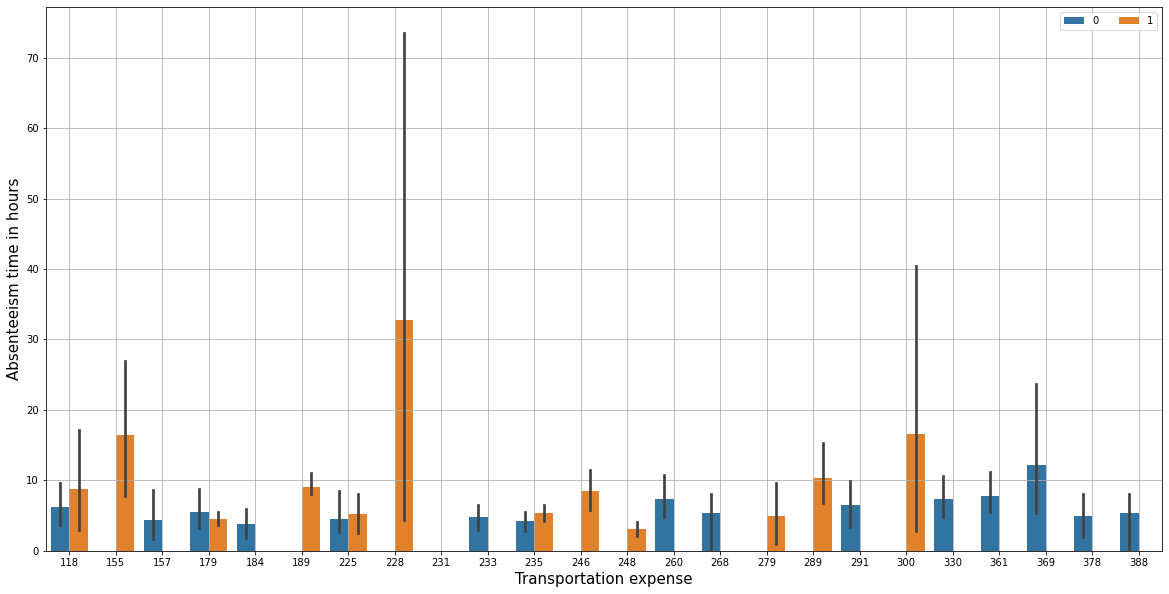

In [7]:
# Analysis for employees Transportation expense and thier Service time
clusServ = km.fit_predict(absent[['Service time']])

ax = sns.barplot(x="Transportation expense", y="Absenteeism time in hours", hue=clusServ, data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel('Transportation expense', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
plt.grid()

In [11]:
ax = pd.DataFrame(clusServ, absent['Service time'])
ax = ax.rename(columns = {'Service time' : 'Service time', 0 : 'clusters'})

show = (ax[ax['clusters']==1])
show.sort_values(by='Service time', ascending=True)

,clusters
Service time,
13,1
13,1
13,1
13,1
13,1
...,...
29,1
29,1
29,1


- service time from 1-12 are in cluster 0 (shorter service time)
- service time from 13-29 are in cluster 1 (Higher service time)

we can see that: 
- People with higher service time have the highest hours of absence. However people with shorter service time are consistently absent
- employees with transportation expense of 228, 300, 155, 369, and 289 have the highest average absent hours (they all have higher service time except employees paying 369 as transportation expense)

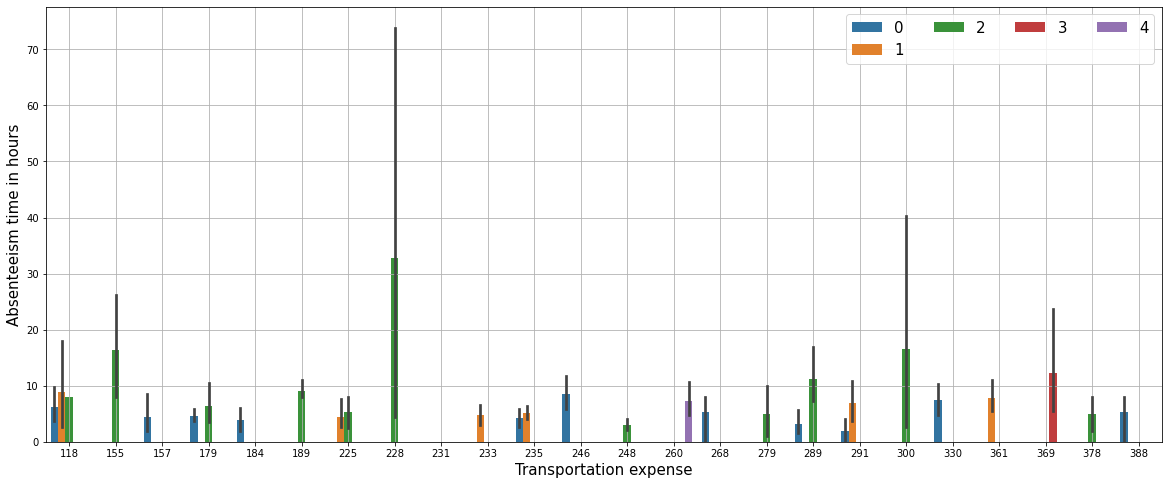

In [14]:
# Analysis for employees Transportation expense and thier No. of Children
ax = sns.barplot(x="Transportation expense", y="Absenteeism time in hours", hue='No. of Children', data=absent)
plt.gcf().set_size_inches(20,8)
ax.legend(loc='upper right', ncol=4, fontsize=15)
ax.set_xlabel('Transportation expense', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
plt.grid()

- Again, we see that employees with transportation expense of 228, 300, 155, 369, and 289 have the highest average absent hours (above 10 hours)
- they all have 2 children except those paying 369 as transportation who have 3
- Those with 0 or 2 children appear to be the most absent employees appearing 11 times each

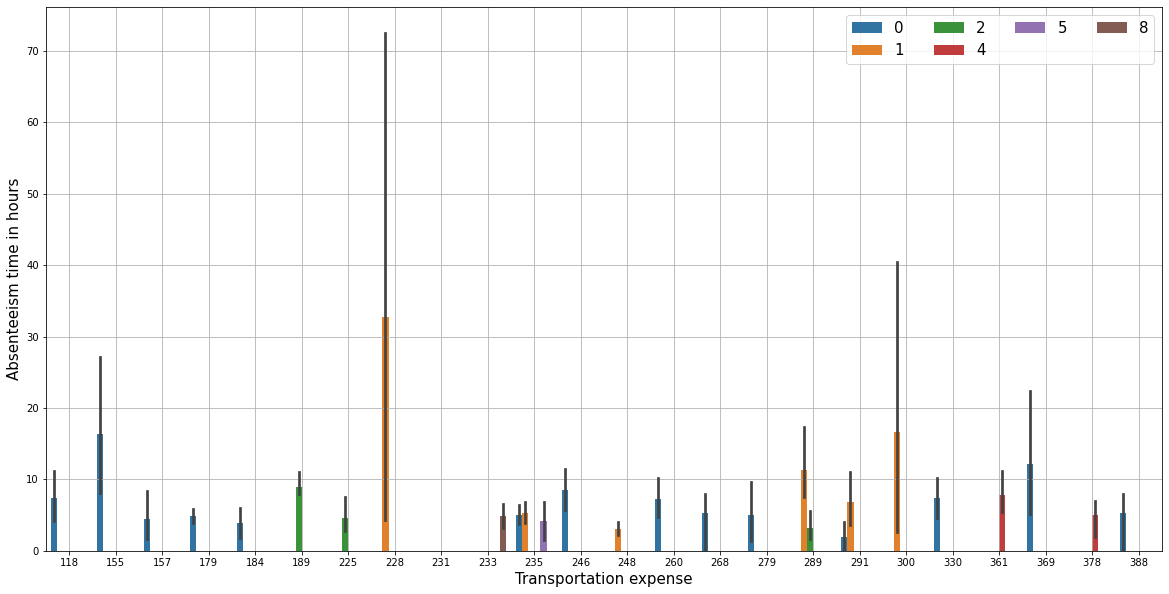

In [15]:
# Analysis for employees Transportation expense and thier pet
ax = sns.barplot(x="Transportation expense", y="Absenteeism time in hours", hue='Pet', data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper right', ncol=4, fontsize=15)
ax.set_xlabel('Transportation expense', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
plt.grid()

- Again, we see that employees with transportation expense of 228, 300, 155, 369, and 289 have the highest average absent hours (above 10 hours)
- Employees with zero pet appear to be more absent. However employees with 1 pet appear to spent longer hour when they are absent (especially those paying 228, 300, and 289 as transportation expense)

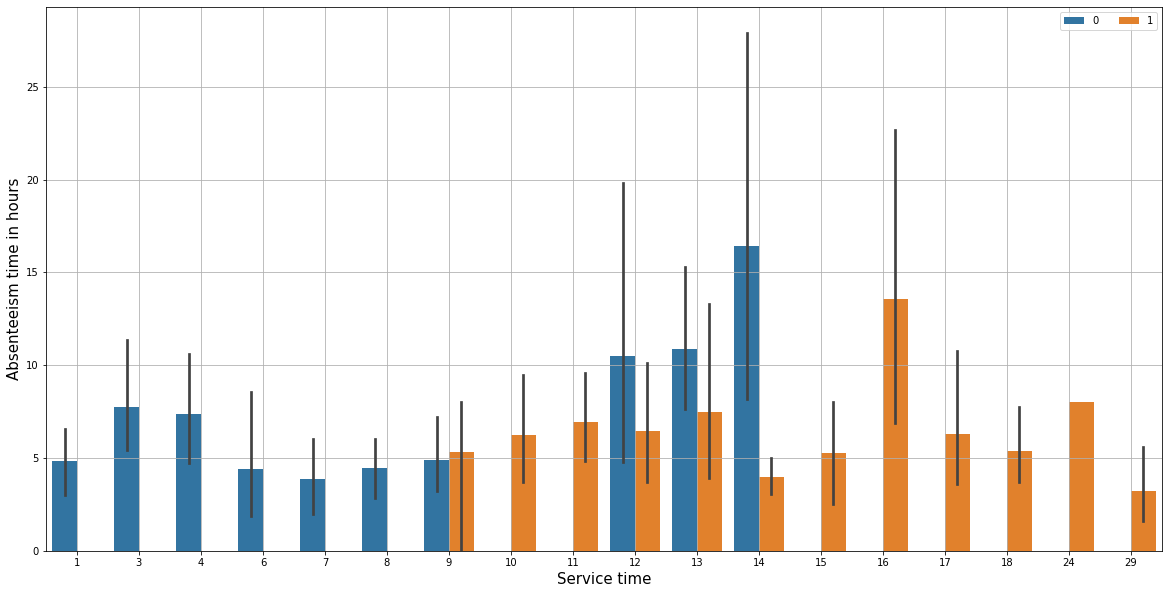

In [17]:
# Analysis for employees Service time and thier Age
clusAge = km.fit_predict(absent[['Age']])

ax = sns.barplot(x="Service time", y="Absenteeism time in hours", hue=clusAge, data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel('Service time', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
plt.grid()

In [20]:
ax = pd.DataFrame(clusAge, absent['Age'])
ax = ax.rename(columns = {'Age' : 'Age', 0 : 'clusters'})

show = (ax[ax['clusters']==1])
show.sort_values(by='Age', ascending=True)

,clusters
Age,
36,1
36,1
36,1
36,1
36,1
...,...
58,1
58,1
58,1


- Ages from 27-34 are in cluster 0 (Mid-age)
- Ages from 36-58 are in cluster 1 (Advanced-age)

we can see that: 
- employees with service time from 1-8 are all of the Mid-age. These ones have a relatively short average hours of absence (below 8 hours)
- employees with service time from 9-14 are a mix of both the Mid-age and Advanced-age. While the advanced-age in this group have average absent hours under 8 hour, the mid-age have average hours above 10. This gorup have the most number of absent employees.
- employees with service time from 15-29 are of the Advanced-age. Those with service time of 16 have average absent hours of 14 while the others are just under 8

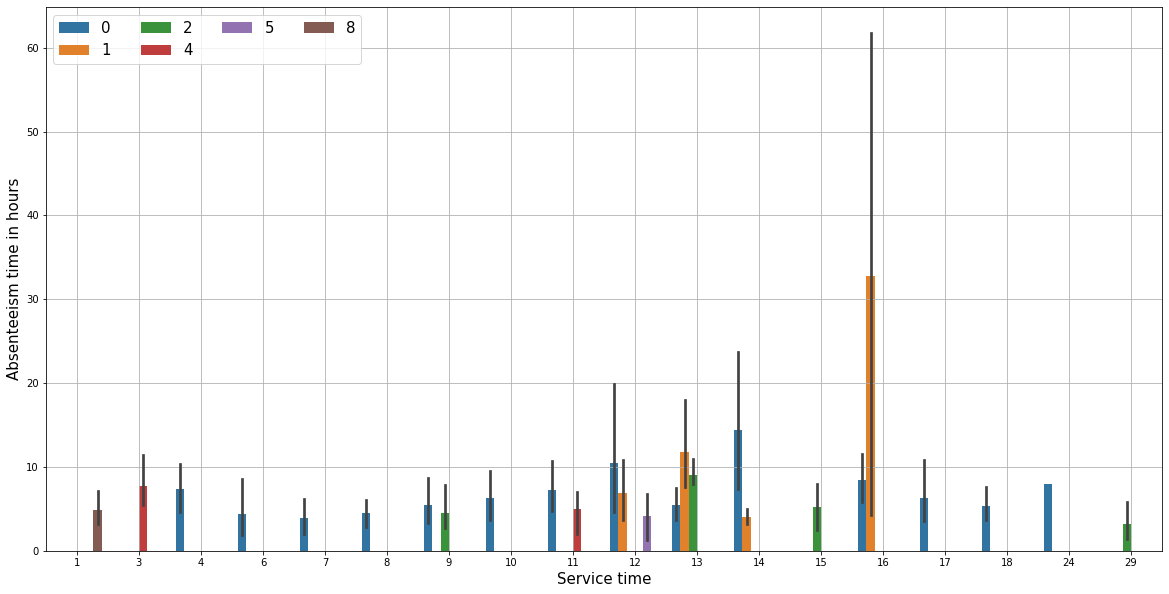

In [22]:
# Analysis for employees Service time and thier Pet
ax = sns.barplot(x="Service time", y="Absenteeism time in hours", hue='Pet', data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper left', ncol=4, fontsize=15)
ax.set_xlabel('Service time', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
plt.grid()

- Almost all the employees with service time between 4 and 29 have either 0 or 5 pets. 
- Employees with service time between 1 and 3 have 8 and 4 pets respectively

- While employees who own either 0 or 1 pet with service time between 12 and 14 have high numbers of absent hours, employees with service time 16 who own 1 pet have the overall highest hours of absence reaching 75

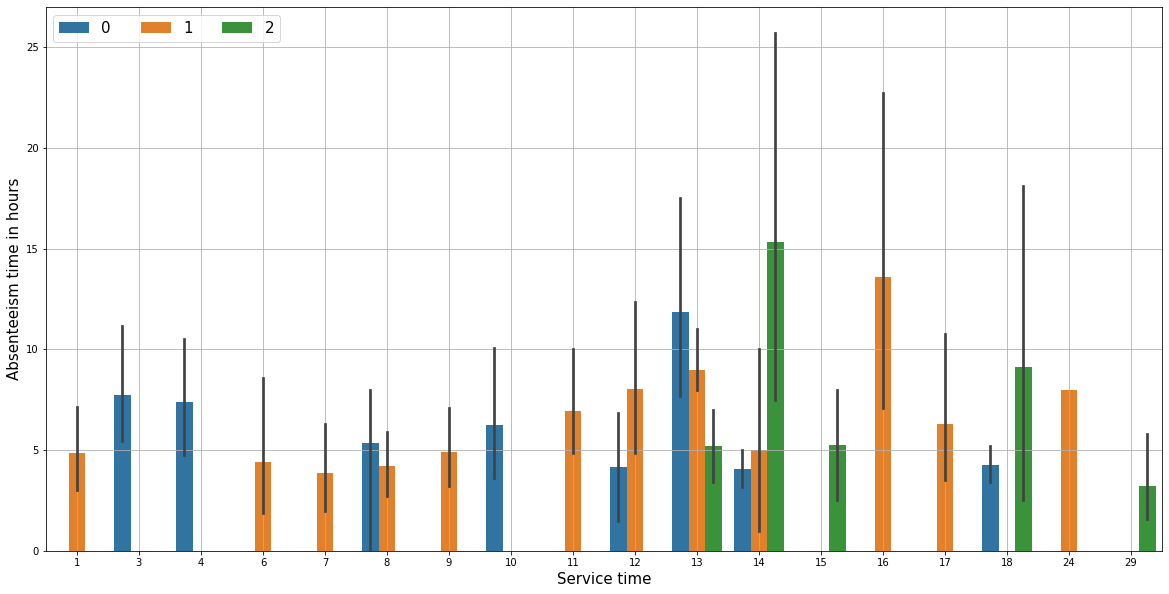

In [25]:
# Analysis for employees Service time and thier Weight
clusWei = km1.fit_predict(absent[['Weight']])

ax = sns.barplot(x="Service time", y="Absenteeism time in hours", hue=clusWei, data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper left', ncol=4, fontsize=15)
ax.set_xlabel('Service time', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
plt.grid()

In [30]:
ax = pd.DataFrame(clusWei, absent['Weight'])
ax = ax.rename(columns = {'Weight' : 'Weight', 0 : 'clusters'})

show = (ax[ax['clusters']==2])
show.sort_values(by='Weight', ascending=True)

,clusters
Weight,
94,2
94,2
94,2
94,2
95,2
...,...
108,2
108,2
108,2


- weights from 56 and 76 are in cluster 1 (light-weight)
- weights from 77 and 90 are in cluster 0 (middle-weight)
- weights from 94 and 108 are in cluster 2 (heavy-weight)

we can see that: 
- there are more light-weight and middle-weight employees with absent hours reaching an average of 5
- we only have heavy-weight employees from service time 13-29
- Epmployees from service time 14-18 have the highest number of average hours absent

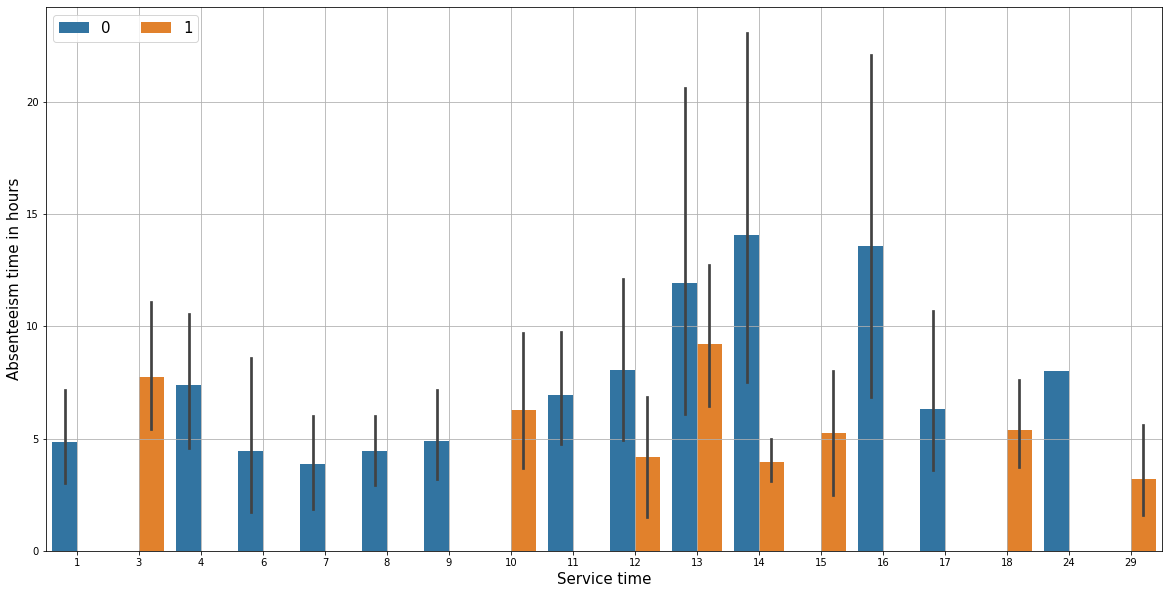

In [31]:
# Analysis for employees Service time and thier Age
clusBMI = km.fit_predict(absent[['Body mass index']])

ax = sns.barplot(x="Service time", y="Absenteeism time in hours", hue=clusBMI, data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper left', ncol=4, fontsize=15)
ax.set_xlabel('Service time', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
plt.grid()

In [32]:
ax = pd.DataFrame(clusBMI, absent['Body mass index'])
ax = ax.rename(columns = {'Body mass index' : 'Body mass index', 0 : 'clusters'})

show = (ax[ax['clusters']==0])
show.sort_values(by='Body mass index', ascending=True)

,clusters
Body mass index,
19,0
19,0
19,0
19,0
19,0
...,...
25,0
25,0
25,0


- Body mass index from 19 and 25 are in cluster 0 (lower BMI)
- Body mass index from 77 and 90 are in cluster 1 (higher BMI)

we can see that:
- service time 12, 13, 14, and 16 have the highest avearage absent hours
- service time 12, 13, and 14 have employees with both lower and higher BMI. However the employees in service time 16 are those of lower BMI 

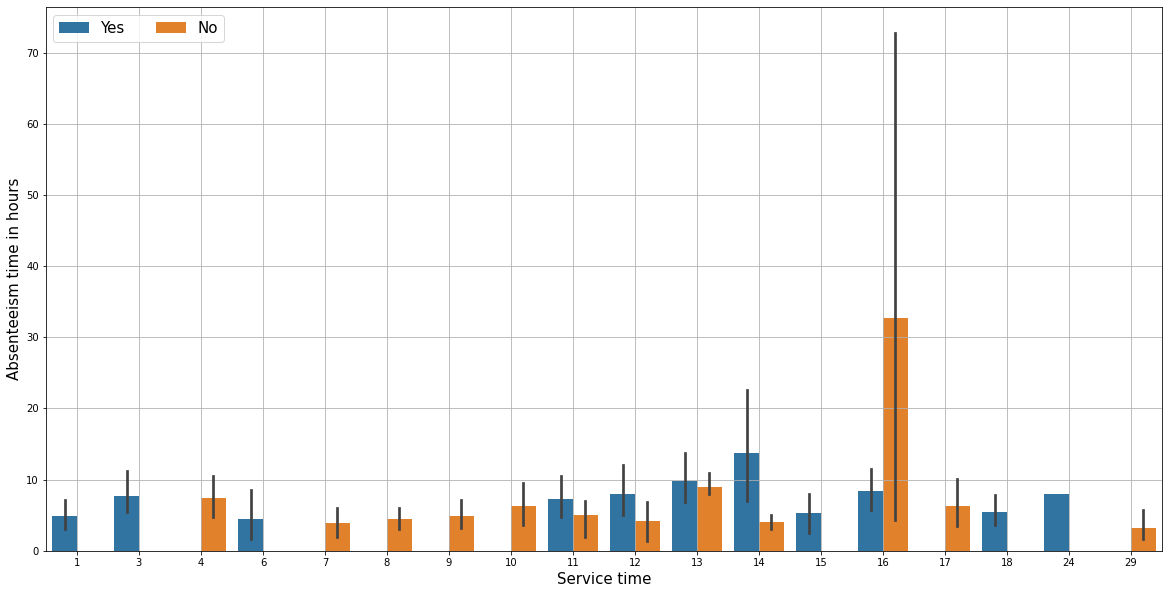

In [41]:
# Analysis for employees Service time and their Social drinking status
ax = sns.barplot(x="Service time", y="Absenteeism time in hours", hue='Social drinker', data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper left', ncol=4, fontsize=15)
ax.set_xlabel('Service time', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
plt.grid()

- employees with service time from 11, 12, 13, 14, and 16 have the average absent hours
- these groups have both social drinkers and no social drinkers
- social drinkers with service time 16 have the highest average absent hours of all at 33 hours

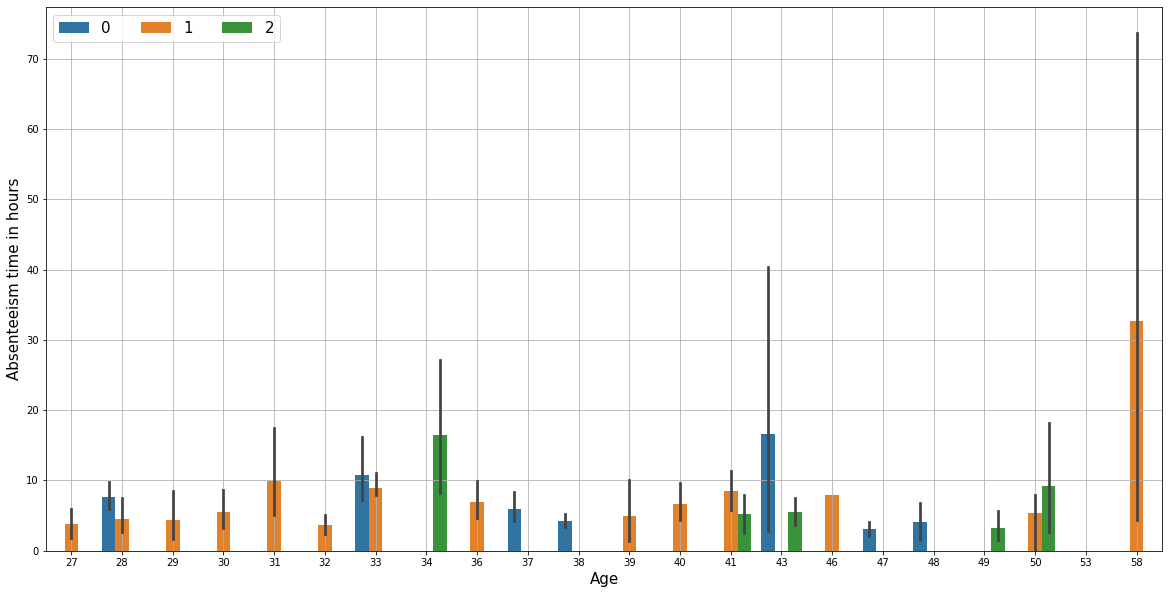

In [38]:
# Analysis for employees Age and thier Weight
ax = sns.barplot(x="Age", y="Absenteeism time in hours", hue=clusWei, data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper left', ncol=4, fontsize=15)
ax.set_xlabel('Age', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
plt.grid()

- weights from 56 and 76 are in cluster 1 (light-weight)
- weights from 77 and 90 are in cluster 0 (middle-weight)
- weights from 94 and 108 are in cluster 2 (heavy-weight)

we can see that:
- there are more light-weight employees across most of the age brackets 
- light-weight employees of age 58 have the highest average absent hours at 33
- middle-weight and haevy-weight employees of ages 43 and also have highr avearage absent hours

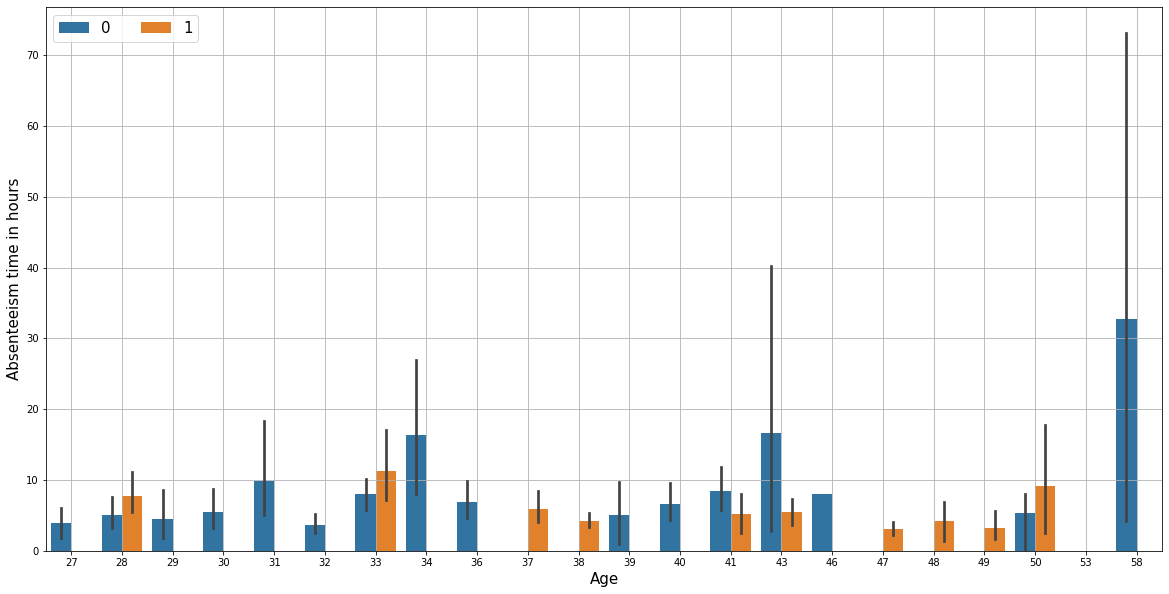

In [40]:
# Analysis for employees Age and thier Body mass index
ax = sns.barplot(x="Age", y="Absenteeism time in hours", hue=clusBMI, data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper left', ncol=4, fontsize=15)
ax.set_xlabel('Age', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
plt.grid()

- Body mass index from 19 and 25 are in cluster 0 (lower BMI)
- Body mass index from 77 and 90 are in cluster 1 (higher BMI)

we see that:
- employees aged 58 with lower BMI have the highest average absent hours at 33
- employees aged 43  and 34 with lower BMI also have high average absent hours at 17

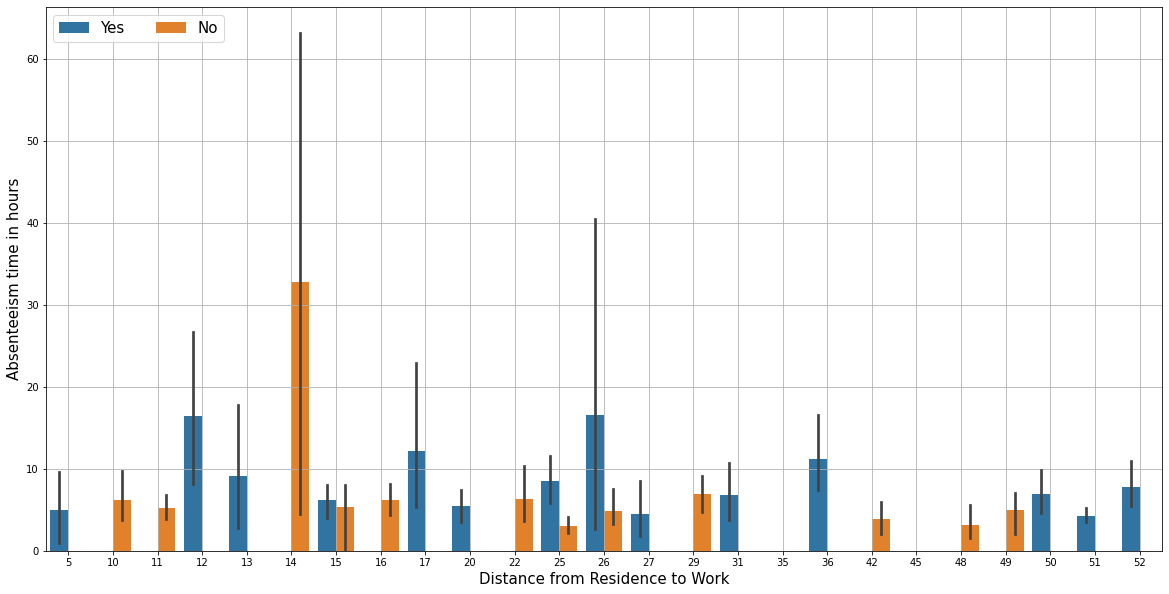

In [42]:
# Analysis for employees Distance from Residence to Work and thier Social drinking status
ax = sns.barplot(x="Distance from Residence to Work", y="Absenteeism time in hours", hue='Social drinker', data=absent)
plt.gcf().set_size_inches(20,10)
ax.legend(loc='upper left', ncol=4, fontsize=15)
ax.set_xlabel('Distance from Residence to Work', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
plt.grid()

- employees who are not social drinkers with a distance of 14 from workplace have the highest average absent hours at 33
- while employees who are social drinkers with a distance of 12, 17, 26, and 36 all have average absent hours above 10

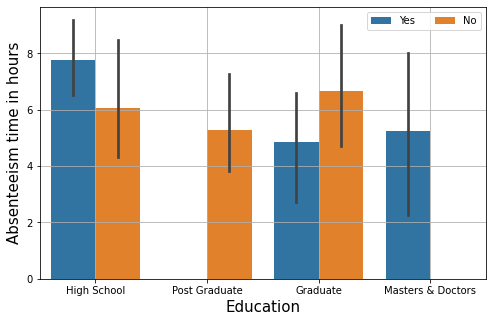

In [43]:
# Analysis for employees Education and thier Social drinking status
ax = sns.barplot(x="Education", y="Absenteeism time in hours", hue='Social drinker', data=absent)
plt.gcf().set_size_inches(8,5)
ax.legend(loc='upper right', ncol=4, fontsize=10)
ax.set_xlabel('Education', fontdict={'fontsize' : 15})
ax.set_ylabel('Absenteeism time in hours', fontdict={'fontsize' : 15})
plt.grid()

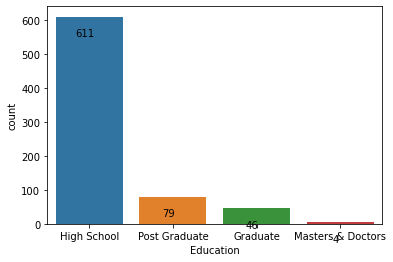

In [44]:
age = sns.countplot(x='Education', data=absent)
for a in age.patches:
    age.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)

This tells us that there are:
- only 4 Masters and Doctorate employees who are social drinkers (with an average absent hours of 5.5)
- 46 Graduates employees are both social drinkers (with an average absent hour of 5) and not social drinkers (with an average absent hour of 7)
- 79 post graduates employees who are not social drinkers (with an average absent hours of 5.5)
- 611 High school certificate employees  who are both social drinker s(with an average absent hour of 7.8) and not social drinkers (with an average absent hour of 6.1)

Obviously high school holders make up the majority of employees

In [52]:
# we need to know the number of high school employees that are social drinkers
test = absent[absent['Education']=='High School']

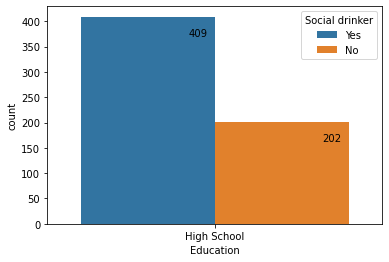

In [51]:
age = sns.countplot(x='Education', hue='Social drinker', data=test)
for a in age.patches:
    age.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)

Now we know that more than 50% high school employees are social drinkers 

# Understanding the pattern of absence for each employee

In [157]:
employee3 = absent[absent['ID']==3]

In [155]:
'''keep replacing columns with strong correlation to analyze the absenteeism pattern of each employee 
against the previous general analysis'''

employee3['Reason for absence'].value_counts()

Physiotherapy                                 38
Dental consultation                           26
Medical consultation                          19
Musculoskeletal/connective tissue diseases    10
Digestive system diseases                      7
Resporatory system diseases                    2
Laboratory examination                         2
health status/contact with health services     2
Abnormal clinical/laboratory findings          2
Skin/Subcutaneous tissue diseases              1
Mental/Behavioral diseases                     1
Morbidity/mortality                            1
Nervous system diseases                        1
Unjustified absence                            1
Name: Reason for absence, dtype: int64

In [156]:
# Employee 3 total average absent hours
employee3.describe()

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,No. of Children,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,113.0,113.0,113.0,113.0,113.0,113.000000,113.000000,113.0,113.0,113.0,113.0,113.0,113.000000
mean,3.0,179.0,51.0,18.0,38.0,262175.061947,95.070796,0.0,0.0,89.0,170.0,31.0,4.265487
std,0.0,0.0,0.0,0.0,0.0,38605.701107,3.999368,0.0,0.0,0.0,0.0,0.0,4.953386
min,3.0,179.0,51.0,18.0,38.0,205917.000000,81.000000,0.0,0.0,89.0,170.0,31.0,0.000000
25%,3.0,179.0,51.0,18.0,38.0,239409.000000,93.000000,0.0,0.0,89.0,170.0,31.0,2.000000
50%,3.0,179.0,51.0,18.0,38.0,253465.000000,96.000000,0.0,0.0,89.0,170.0,31.0,3.000000
75%,3.0,179.0,51.0,18.0,38.0,268519.000000,97.000000,0.0,0.0,89.0,170.0,31.0,4.000000
max,3.0,179.0,51.0,18.0,38.0,378884.000000,100.000000,0.0,0.0,89.0,170.0,31.0,32.000000


Employee ID 3 absence pattern
- Physiotherapy, Dental consultation, and Medical consultation are the top 3 reasons for absence (same as the general resons for absence NICD): which means he/she is frequently absent from work but spend shorter time when absent
- mostly absent when meeting higher hit target
- mostly absent during autumn

Total Average Absent hours
- leaves at a longer distance from work: which means lower average hours of absence
- has a service time of 18 and is aged 38 (with the Advanced-age): which means lower average hours of absence
- 3 of the top four hit targets are above 95 (higher hit target): which means higher average hours of absence
- is a high school cert employee but not a social drinker: which means lower average hours of absence
- has 0 pet and 0 children: which means lower average hours of absence
- Weighs 89 (middle-weight) and has a body mass index of 31 (higher BMI): which means lower average hours of absence 

Employee ID 3 has an average absent hour of 4.5

In [158]:
employee28 = absent[absent['ID']==28]
employee28.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'No. of Children',
       'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height',
       'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [171]:
employee28['Body mass index'].value_counts()

24    76
Name: Body mass index, dtype: int64

In [172]:
employee28.describe()

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,No. of Children,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,76.0,76.0,76.0,76.0,76.0,76.000000,76.000000,76.0,76.0,76.0,76.0,76.0,76.000000
mean,28.0,225.0,26.0,9.0,28.0,282104.605263,94.947368,1.0,2.0,69.0,169.0,24.0,4.565789
std,0.0,0.0,0.0,0.0,0.0,36743.669206,2.818485,0.0,0.0,0.0,0.0,0.0,12.745023
min,28.0,225.0,26.0,9.0,28.0,222196.000000,87.000000,1.0,2.0,69.0,169.0,24.0,0.000000
25%,28.0,225.0,26.0,9.0,28.0,253834.000000,93.000000,1.0,2.0,69.0,169.0,24.0,2.000000
50%,28.0,225.0,26.0,9.0,28.0,280549.000000,95.000000,1.0,2.0,69.0,169.0,24.0,2.000000
75%,28.0,225.0,26.0,9.0,28.0,306345.000000,97.000000,1.0,2.0,69.0,169.0,24.0,3.000000
max,28.0,225.0,26.0,9.0,28.0,378884.000000,100.000000,1.0,2.0,69.0,169.0,24.0,112.000000


Employee ID 28 absence pattern
- Medical consultation and Dental consultation are the top reasons for absence (same as the general resons for absence NICD): which means he/she is frequently absent from work but spend shorter time when absent
- mostly absent when meeting higher hit target
- mostly absent during Spring and Autumn

Total Average Absent hours
- leaves at a shorter distance from work: which means higher average hours of absence
- has a service time of 9 and is aged 28 (with the Mid-age): which means lower average hours of absence
- 3 of the top four hit targets are above 95 (higher hit target): which means longer average hours of absence
- is a high school cert employee but not a social drinker: which means lower average hours of absence
- has 2 pets and 1 child: which means lower average hours of absence
- Weighs 69 (light-weight) and has a body mass index of 24 (lower BMI): which means lower average hours of absence 

Employee ID 28 has an average absent hour of 4.56